In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, \
  mean_absolute_error, r2_score, mean_squared_error, accuracy_score, precision_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
df_returns = pd.DataFrame()

In [4]:
df_returns = pd.read_csv('IBRX-returns.csv', index_col=0, parse_dates=True)
df = pd.read_csv('IBRX100.csv', index_col=0, parse_dates=True)

#for name in df.columns:
#  df_returns[name] = np.log(df[name]).diff()

In [5]:
df.isna().sum().sum()

0

In [6]:
df_returns.head()

,VALE3.SA,PETR4.SA,PETR3.SA,ITUB4.SA,BBDC4.SA,B3SA3.SA,ABEV3.SA,JBSS3.SA,WEGE3.SA,SUZB3.SA,ITSA4.SA,BBAS3.SA,BRAX11.SA,BOVA11.SA
Date,,,,,,,,,,,,,,
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.043537,0.030814,0.034304,0.024671,0.020945,0.017285,-0.011462,0.029801,0.023306,0.0,0.029193,-0.004539,0.021995,0.023738
2012-01-04,0.006765,0.007114,0.006225,0.001146,0.001593,0.017983,-0.023517,0.018820,0.005222,0.0,0.001742,-0.004975,0.000000,0.000000
2012-01-05,-0.027102,-0.011587,-0.006225,-0.007473,-0.006388,-0.010951,-0.019997,0.016807,0.006231,0.0,-0.004361,-0.010445,-0.009189,-0.013620
2012-01-06,-0.008637,0.000896,-0.000833,0.007473,0.012419,0.014903,-0.002528,0.011599,-0.011453,0.0,0.005231,-0.025522,-0.000250,0.002427


In [7]:
df_returns['BOVA11.SA'] = df_returns['BOVA11.SA'].shift(-1)
df_returns['BOVA11.SA'].tail()

Date
2022-01-19    0.008136
2022-01-20   -0.001908
2022-01-21   -0.005939
2022-01-24    0.021388
2022-01-25         NaN
Name: BOVA11.SA, dtype: float64

In [8]:
Ntest = 1000
train = df_returns.iloc[1:-Ntest]
test = df_returns.iloc[-Ntest:-1]

In [9]:
df_returns.columns

Index(['VALE3.SA', 'PETR4.SA', 'PETR3.SA', 'ITUB4.SA', 'BBDC4.SA', 'B3SA3.SA',
       'ABEV3.SA', 'JBSS3.SA', 'WEGE3.SA', 'SUZB3.SA', 'ITSA4.SA', 'BBAS3.SA',
       'BRAX11.SA', 'BOVA11.SA'],
      dtype='object')

In [10]:
# x_cols = df.columns.drop('SPY')
x_cols = ['VALE3.SA', 'PETR4.SA', 'PETR3.SA', 'ITUB4.SA', 'BBDC4.SA', 'B3SA3.SA',
          'ABEV3.SA', 'JBSS3.SA', 'WEGE3.SA', 'SUZB3.SA', 'ITSA4.SA', 'BBAS3.SA']
x_cols

['VALE3.SA',
 'PETR4.SA',
 'PETR3.SA',
 'ITUB4.SA',
 'BBDC4.SA',
 'B3SA3.SA',
 'ABEV3.SA',
 'JBSS3.SA',
 'WEGE3.SA',
 'SUZB3.SA',
 'ITSA4.SA',
 'BBAS3.SA']

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

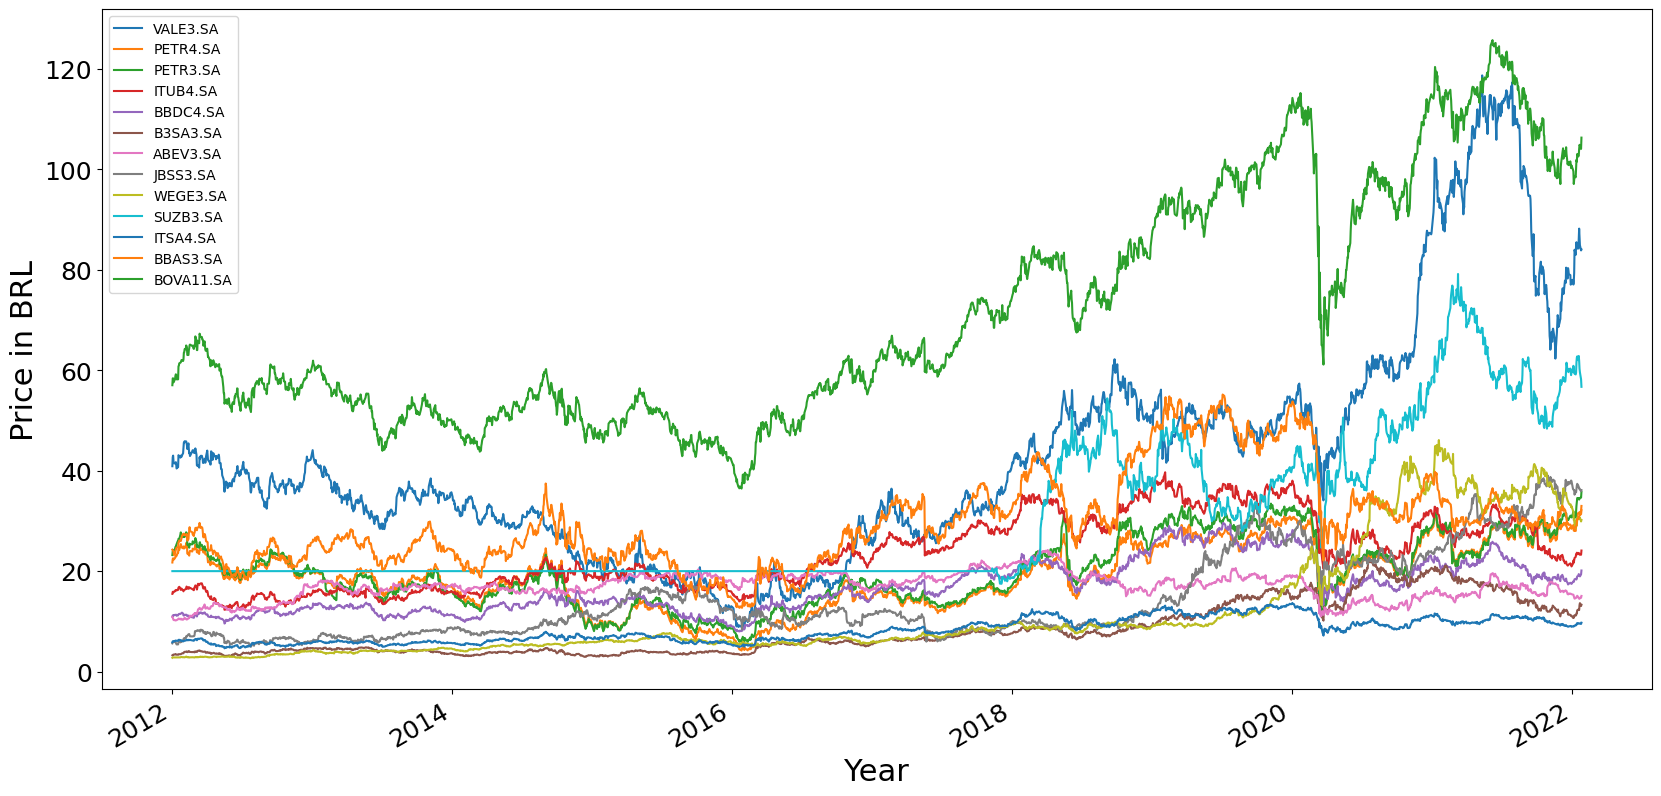

In [11]:
df[['VALE3.SA', 'PETR4.SA', 'PETR3.SA', 'ITUB4.SA', 'BBDC4.SA', 'B3SA3.SA',
          'ABEV3.SA', 'JBSS3.SA', 'WEGE3.SA', 'SUZB3.SA', 'ITSA4.SA', 'BBAS3.SA', 'BOVA11.SA']].plot( figsize=(20,10));
plt.xlabel("Year", fontsize=22)
plt.ylabel("Price in BRL", fontsize=22)
plt.yticks(size=18)
plt.xticks(size=18)
#plt.savefig('BR-STOCKS.PDF', format='PDF')

In [12]:
Xtrain = train[x_cols]
Ytrain = train['BOVA11.SA']
Xtest = test[x_cols]
Ytest = test['BOVA11.SA']

In [13]:
Ytest.head()

Date
2018-01-10    0.013924
2018-01-11    0.000130
2018-01-12    0.005204
2018-01-15   -0.000130
2018-01-16    0.017367
Name: BOVA11.SA, dtype: float64

In [14]:
Xtrain.head()

,VALE3.SA,PETR4.SA,PETR3.SA,ITUB4.SA,BBDC4.SA,B3SA3.SA,ABEV3.SA,JBSS3.SA,WEGE3.SA,SUZB3.SA,ITSA4.SA,BBAS3.SA
Date,,,,,,,,,,,,
2012-01-03,0.043537,0.030814,0.034304,0.024671,0.020945,0.017285,-0.011462,0.029801,0.023306,0.0,0.029193,-0.004539
2012-01-04,0.006765,0.007114,0.006225,0.001146,0.001593,0.017983,-0.023517,0.018820,0.005222,0.0,0.001742,-0.004975
2012-01-05,-0.027102,-0.011587,-0.006225,-0.007473,-0.006388,-0.010951,-0.019997,0.016807,0.006231,0.0,-0.004361,-0.010445
2012-01-06,-0.008637,0.000896,-0.000833,0.007473,0.012419,0.014903,-0.002528,0.011599,-0.011453,0.0,0.005231,-0.025522
2012-01-09,-0.001206,0.013345,0.019803,0.006280,0.002528,0.015656,-0.001949,-0.033504,0.000000,0.0,0.006932,0.008153


## Buy & Hold

In [15]:
#std buy-and-hold train and test
Ytrain.std(), Ytest.std()

(0.014595554557542289, 0.01811346510486711)

In [16]:
#SR buy-and-hold train and test
Ytrain.mean()/Ytrain.std(), Ytest.mean()/Ytest.std()

(0.011830254737761503, 0.018849659662433623)

In [17]:
# Total return buy-and-hold train and test
Ytrain.sum(), Ytest.sum()

(0.25814034703965844, 0.3410912198815786)

## Linear Regressor

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, Ytrain)
model.score(Xtrain, Ytrain), model.score(Xtest, Ytest)

(0.008609294869767914, 0.0021352073289118145)

In [19]:
# Direction
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
np.mean(np.sign(Ptrain) == np.sign(Ytrain)), np.mean(np.sign(Ptest) == np.sign(Ytest))

(0.5043478260869565, 0.5095095095095095)

In [20]:
set(np.sign(Ptrain)), set(np.sign(Ptest))

({-1.0, 1.0}, {-1.0, 1.0})

In [21]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

train_idx[0] = False
test_idx[-1] = False

In [22]:
df_returns['Position'] = 0 # create new column
df_returns.loc[train_idx,'Position'] = (Ptrain > 0)
df_returns.loc[test_idx,'Position'] = (Ptest > 0)

In [23]:
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['BOVA11.SA']

In [24]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.8667140132700144

In [25]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.7984340712761924

In [26]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.01105034903643209, 0.052463665444862397)

In [27]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.012766229284670569, 0.0626052757442228)

In [28]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.00021105490458057274, 0.00032706933688000906)

In [29]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.014527728817009655, 0.01808505838752004)

In [30]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.010870090219204194, 0.011998578232166369)

In [31]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(0.008609294869767914, 0.0021352073289118145)

In [32]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(107908191034.45757, 22053931044.230965)

In [33]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.751265372251096

In [34]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.745454081725385

In [35]:
#df_returns['Position'].to_csv('LinearRegressorBool.csv', index = True)
#df_returns['AlgoReturn'].to_csv('LinearRegressorAlgoReturn.csv', index = True)
sum(df_returns['Position'])

1437

## Ridge Regressor

In [36]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(Xtrain, Ytrain)
model.score(Xtrain, Ytrain), model.score(Xtest, Ytest)

(0.004595796763934623, 0.0005891463957395926)

In [37]:
# Direction
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
np.mean(np.sign(Ptrain) == np.sign(Ytrain)), np.mean(np.sign(Ptest) == np.sign(Ytest))

(0.4909698996655518, 0.5115115115115115)

In [38]:
set(np.sign(Ptrain)), set(np.sign(Ptest))

({-1.0, 1.0}, {-1.0, 1.0})

In [39]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

train_idx[0] = False
test_idx[-1] = False

In [40]:
df_returns['Position'] = 0 # create new column
df_returns.loc[train_idx,'Position'] = (Ptrain > 0)
df_returns.loc[test_idx,'Position'] = (Ptest > 0)

In [41]:
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['BOVA11.SA']

In [42]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.5116214385245821

In [43]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.4543203960577595

In [44]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.011842245420754755, 0.02889837913762327)

In [45]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.01481581531482129, 0.030695251092529838)

In [46]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.00021190932903238327, 0.00032757608802295215)

In [47]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.014557105791756246, 0.018099063180809997)

In [48]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.010871246454270964, 0.01197241959623269)

In [49]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(0.004595796763934623, 0.0005891463957395926)

In [50]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(47033475492.16297, 6961815357.127645)

In [51]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.8590930625977427

In [52]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.8693300117186624

In [53]:
#df_returns['Position'].to_csv('RidgeRegressorBool.csv', index = True)
#df_returns['AlgoReturn'].to_csv('RidgeRegressorAlgoReturn.csv', index = True)
sum(df_returns['Position'])

1661

## Logistic Regressor

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=10)
Ctrain = (Ytrain > 0)
Ctest = (Ytest > 0)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.5284280936454849, 0.5315315315315315)

In [55]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
set(Ptrain), set(Ptest)

({False, True}, {False, True})

In [56]:
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['BOVA11.SA']

In [57]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.6766611987393788

In [58]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.8020132439431402

In [59]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.010301207380032255, 0.04393816858061621)

In [60]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.013562405116763963, 0.05919422499854495)

In [61]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.5284280936454849, 0.5315315315315315)

In [62]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.5286713286713287, 0.5553359683794467)

In [63]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.5174537987679673, 0.5456310679611651)

In [64]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.5283845842714325, 0.5312876657292086)

In [65]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.47756855472466636, 0.5052287601548175)

In [66]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.6910633507318026, 0.7107944570372068)

In [67]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.483384904229031, 0.5113486173981093)

In [68]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-2242.2884332037165, -1540.416253851745)

In [69]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(72298589335864.12, 4508107735285.963)

In [70]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.988524325929235

In [71]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.986031051548461

In [72]:
#df_returns['Position'].to_csv('LogisticRegressorBool.csv', index = True)
#df_returns['AlgoReturn'].to_csv('LogisticRegressorAlgoReturn.csv', index = True)
sum(df_returns['Position'])

1221

## Linear Support Vector Machine using SVC

In [73]:
from sklearn.svm import SVC
model = SVC(C=10)
Ctrain = (Ytrain > 0)
Ctest = (Ytest > 0)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.7397993311036789, 0.5175175175175175)

In [74]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
set(Ptrain), set(Ptest)

({False, True}, {False, True})

In [75]:
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['BOVA11.SA']

In [76]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

4.11922453901937

In [77]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.5164900034852237

In [78]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.009819235913299185, 0.2806057583442373)

In [79]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.01445736417642566, 0.035760807031392124)

In [80]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.7397993311036789, 0.5175175175175175)

In [81]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.7652303120356612, 0.5411764705882353)

In [82]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.7258632840028189, 0.5338491295938104)

In [83]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.7397002974475351, 0.5170429891522699)

In [84]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.44486947333298743, 0.5098043822578364)

In [85]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.6669853621579618, 0.7140058699043281)

In [86]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.4532257922852184, 0.5151895313054085)

In [87]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-2088.690650567816, -1554.3761445731586)

In [88]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(18074647334061.934, 4508107735283.531)

In [89]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9842201596028837

In [90]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.985728792040286

In [91]:
#df_returns['Position'].to_csv('SVCBool.csv', index = True)
#df_returns['AlgoReturn'].to_csv('SVCAlgoReturn.csv', index = True)
sum(df_returns['Position'])

1183

## Linear Support Vector Machine using LinearSVC

In [92]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=10)
Ctrain = (Ytrain > 0)
Ctest = (Ytest > 0)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.5377926421404682, 0.5335335335335335)

In [93]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
set(Ptrain), set(Ptest)

({False, True}, {False, True})

In [94]:
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['BOVA11.SA']

In [95]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.7744640444090257

In [96]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.8261567176042311

In [97]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.010270704560747652, 0.05043822914410279)

In [98]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.013878234903130428, 0.0595885360838646)

In [99]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.5377926421404682, 0.5335335335335335)

In [100]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.5378266850068776, 0.5562015503875969)

In [101]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.5308893414799729, 0.551923076923077)

In [102]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.5377652777429781, 0.5328023302531137)

In [103]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.485464470650192, 0.5151904348822228)

In [104]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.6967528045513646, 0.7177676747264555)

In [105]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.4913575946706874, 0.5211235516404701)

In [106]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-2279.37801267884, -1570.8085999559162)

In [107]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(78323471780509.08, 4508107735305.562)

In [108]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9884311119754556

In [109]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.9855715104200533

In [110]:
#df_returns['Position'].to_csv('LinearSVCBool.csv', index = True)
#df_returns['AlgoReturn'].to_csv('LinearSVCAlgoReturn.csv', index = True)
sum(df_returns['Position'])

1243

## Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=4)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.9979933110367893, 0.5265265265265265)

In [112]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [113]:
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest

In [114]:
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['BOVA11.SA']

In [115]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

8.249759159316733

In [116]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.5036702110337119

In [117]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.008852812348104547, 0.6233311330228213)

In [118]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.013235478671188053, 0.03809264462166028)

In [119]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.9979933110367893, 0.5265265265265265)

In [120]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.9959946595460614, 0.5532359081419624)

In [121]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.9979933110367892, 0.5284147557328016)

In [122]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.9979973297730307, 0.5275994375251105)

In [123]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.4901797949111849, 0.4787990164769585)

In [124]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.7001284131580326, 0.691953044994354)

In [125]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.5008306753531507, 0.48493352200650297)

In [126]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-2301.5273612254355, -1459.781025410467)

In [127]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(162.73019702214418, 9016215470386.598)

In [128]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9775968078995882

In [129]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.987223737136228

In [130]:
#df_returns['Position'].to_csv('RandomForestBool.csv', index = True)
#df_returns['AlgoReturn'].to_csv('RandomForestAlgoReturn.csv', index = True)
sum(df_returns['Position'])

1228

## KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
Ctrain = (Ytrain > 0)
Ctest = (Ytest > 0)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.6976588628762542, 0.5475475475475475)

In [132]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['BOVA11.SA']
set(Ptrain), set(Ptest)

({False, True}, {False, True})

In [133]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

3.4136543983642413

In [134]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.9029991742590321

In [135]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.009930893139827417, 0.22992704043039838)

In [136]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.011689097171794999, 0.07732873326756368)

In [137]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.6976588628762542, 0.5475475475475475)

In [138]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.7058823529411765, 0.5756302521008403)

In [139]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.6904109589041095, 0.548)

In [140]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.697614692691238, 0.548818802732021)

In [141]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.4732381290395495, 0.47499655609012104)

In [142]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.6879230545922629, 0.6891999391251576)

In [143]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.48099111945408296, 0.48205688062052665)

In [144]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-2221.94707330017, -1448.1799949325057)

In [145]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(33136853445678.31, 4508107735273.969)

In [146]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9849482573943817

In [147]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.98744081226015

In [148]:
#df_returns['Position'].to_csv('KNNBool.csv', index = True)
sum(df_returns['Position'])

1190

## Naive Bayes Gaussian Classifier

In [149]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
Ctrain = (Ytrain > 0)
Ctest = (Ytest > 0)
model.fit(Xtrain, Ctrain)
model.score(Xtrain, Ctrain), model.score(Xtest, Ctest)

(0.5337792642140469, 0.4944944944944945)

In [150]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
df_returns.loc[train_idx,'Position'] = Ptrain
df_returns.loc[test_idx,'Position'] = Ptest
df_returns['AlgoReturn'] = df_returns['Position'] * df_returns['BOVA11.SA']
set(Ptrain), set(Ptest)

({False, True}, {False, True})

In [151]:
# Total algo log return train
df_returns.iloc[1:-Ntest]['AlgoReturn'].sum()

0.5476056785565296

In [152]:
# Total algo log return test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].sum()

0.52216365469633

In [153]:
#std and SR algo train
df_returns.iloc[1:-Ntest]['AlgoReturn'].std(), df_returns.iloc[1:-Ntest]['AlgoReturn'].mean()/df_returns.iloc[1:-Ntest]['AlgoReturn'].std()

(0.009545528468686336, 0.038373090079321846)

In [154]:
#std and SR algo test
df_returns.iloc[-Ntest:-1]['AlgoReturn'].std(), df_returns.iloc[-Ntest:-1]['AlgoReturn'].mean()/df_returns.iloc[-Ntest:-1]['AlgoReturn'].std()

(0.005906268119430871, 0.08849688677657484)

In [155]:
accuracy_score(Ctrain,Ptrain), accuracy_score(Ctest,Ptest)

(0.5337792642140469, 0.4944944944944945)

In [156]:
precision_score(Ctrain,Ptrain), precision_score(Ctest,Ptest)

(0.5463137996219282, 0.611764705882353)

In [157]:
f1_score(Ctrain,Ptrain), f1_score(Ctest,Ptest)

(0.45333333333333325, 0.17077175697865352)

In [158]:
roc_auc_score(Ctrain,Ptrain), roc_auc_score(Ctest,Ptest)

(0.5334861137459418, 0.5148814785054239)

In [159]:
# MSE
mean_squared_error(Ytrain, Ptrain), mean_squared_error(Ytest, Ptest)

(0.35332648853093107, 0.08436759817132766)

In [160]:
# RMSE
mean_squared_error(Ytrain, Ptrain, squared=False), mean_squared_error(Ytest, Ptest, squared=False)

(0.5944127257478015, 0.2904610097264823)

In [161]:
# MAE
mean_absolute_error(Ytrain, Ptrain), mean_absolute_error(Ytest, Ptest) 

(0.360173971841477, 0.09529894719233141)

In [162]:
# R^2
r2_score(Ytrain, Ptrain), r2_score(Ytest, Ptest)

(-1658.684702906979, -256.39941463321935)

In [163]:
# MAPE
mean_absolute_percentage_error(Ytrain, Ptrain), mean_absolute_percentage_error(Ytest, Ptest)

(39161735890275.555, 20.324165356568646)

In [164]:
#sMAPE train
def smape(Ytrain, Ptrain):
    numerator = np.abs(Ytrain - Ptrain)
    denominator = (np.abs(Ytrain) + np.abs(Ptrain)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytrain, Ptrain)

1.9908726781878654

In [165]:
#sMAPE test
def smape(Ytest, Ptest):
    numerator = np.abs(Ytest - Ptest)
    denominator = (np.abs(Ytest) + np.abs(Ptest)) / 2
    ratio = numerator / denominator
    return ratio.mean()

smape(Ytest, Ptest)

1.9965549450880964

In [166]:
#df_returns['Position'].to_csv('NBGCBool.csv', index = True)
sum(df_returns['Position'])

614